<a href="https://colab.research.google.com/github/XTMay/python-data-science-course/blob/main/notebooks/Lec_13_SciPy_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 SciPy 数据分析实战教程


## 📚 课程目标

通过本教程，你将学会：
- 使用 SciPy 进行科学计算与数据分析
- 掌握曲线拟合、统计检验、信号处理等实用技术
- 解决真实数据分析中的常见问题
- 理解 SciPy 各子模块在数据科学中的应用

---

# 1. SciPy 简介

## 什么是 SciPy？

**SciPy** (Scientific Python) 是一个基于 NumPy 的开源 Python 库，专门用于科学计算和技术计算。它提供了大量用于数学、科学和工程领域的算法和函数。

## SciPy 在数据分析中的作用

SciPy 是数据科学家的必备工具之一，它能够：
- **优化问题求解**：参数估计、曲线拟合
- **统计分析**：假设检验、概率分布拟合
- **信号处理**：滤波、频谱分析
- **数值积分**：求解微分方程
- **线性代数**：矩阵分解、特征值计算
- **空间计算**：距离计算、聚类分析

## SciPy 主要子模块

| 子模块 | 功能描述 |
|--------|----------|
| `scipy.optimize` | 优化与曲线拟合 |
| `scipy.stats` | 统计分布与假设检验 |
| `scipy.signal` | 信号处理与滤波 |
| `scipy.integrate` | 数值积分与微分方程求解 |
| `scipy.linalg` | 线性代数运算 |
| `scipy.spatial` | 空间数据结构与算法 |

## 安装 SciPy

在 Google Colab 中，SciPy 已经预装。如果需要在本地安装：

In [ ]:
# 如果需要安装或升级
# !pip install scipy --upgrade

# 如果需要安装或升级
# !pip install scipy --upgrade

# 导入必要的库
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize, stats, signal, integrate, linalg

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置图表样式
plt.style.use('seaborn-v0_8-darkgrid')

print(f"SciPy 版本: {scipy.__version__}")
print(f"NumPy 版本: {np.__version__}")

SciPy 版本: 1.16.1
NumPy 版本: 2.2.6


---

# 2. SciPy 数据分析实战

接下来我们将通过实际案例学习 SciPy 的核心功能。

## 2.1 使用 scipy.optimize.curve_fit 做曲线拟合

### 📖 知识点

**曲线拟合**是数据分析中的重要技术，用于找到最佳拟合参数，使得模型函数与观测数据的误差最小。

`scipy.optimize.curve_fit` 使用非线性最小二乘法进行参数估计。

### 应用场景
- 物理实验数据拟合
- 指数衰减/增长建模
- 药物浓度衰减分析
- 放射性物质衰变

### 实战：指数衰减函数拟合

📊 曲线拟合结果
真实参数: A=5.000, k=0.500, C=1.000
拟合参数: A=5.344±0.163, k=0.526±0.035, C=0.911±0.071


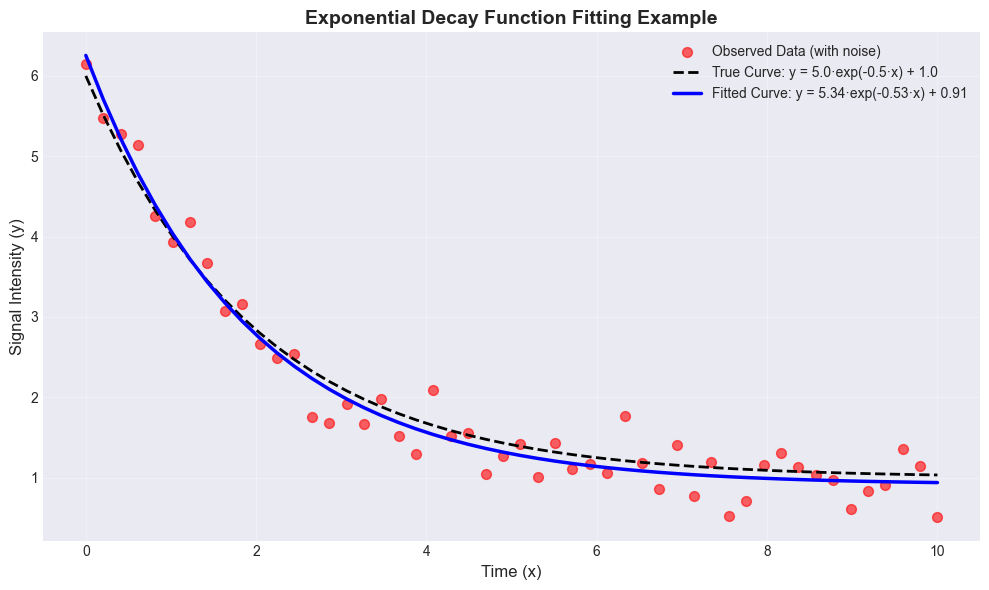


💡 解释：
- A (初始幅度): 表示 x=0 时的初始值减去基线
- k (衰减速率): k 越大，衰减越快；半衰期 t_half = ln(2)/k
- C (基线): 当 x → ∞ 时，函数趋于的稳定值
- 本例中，半衰期约为 1.32 个时间单位


In [ ]:
from scipy.optimize import curve_fit

# 定义指数衰减函数模型: y = A * exp(-k * x) + C
# A: 初始幅度
# k: 衰减速率
# C: 基线偏移
def exponential_decay(x, A, k, C):
    return A * np.exp(-k * x) + C

# 生成模拟数据（真实值 + 噪声）
np.random.seed(42)
x_data = np.linspace(0, 10, 50)
A_true, k_true, C_true = 5.0, 0.5, 1.0
y_true = exponential_decay(x_data, A_true, k_true, C_true)
y_noise = y_true + np.random.normal(0, 0.3, size=x_data.shape)  # 添加高斯噪声

# 使用 curve_fit 进行参数估计
# popt: 最优参数
# pcov: 参数的协方差矩阵（用于估计参数不确定性）
popt, pcov = curve_fit(exponential_decay, x_data, y_noise, p0=[4, 0.4, 0.5])

A_fit, k_fit, C_fit = popt
perr = np.sqrt(np.diag(pcov))  # 参数标准误差

print("="*50)
print("📊 曲线拟合结果")
print("="*50)
print(f"真实参数: A={A_true:.3f}, k={k_true:.3f}, C={C_true:.3f}")
print(f"拟合参数: A={A_fit:.3f}±{perr[0]:.3f}, k={k_fit:.3f}±{perr[1]:.3f}, C={C_fit:.3f}±{perr[2]:.3f}")
print("="*50)

# 可视化
y_fit = exponential_decay(x_data, A_fit, k_fit, C_fit)

plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_noise, color='red', alpha=0.6, s=50, label='Observed Data (with noise)')
plt.plot(x_data, y_true, 'k--', linewidth=2, label=f'True Curve: y = {A_true}·exp(-{k_true}·x) + {C_true}')
plt.plot(x_data, y_fit, 'b-', linewidth=2.5,
         label=f'Fitted Curve: y = {A_fit:.2f}·exp(-{k_fit:.2f}·x) + {C_fit:.2f}')
plt.xlabel('Time (x)', fontsize=12)
plt.ylabel('Signal Intensity (y)', fontsize=12)
plt.title('Exponential Decay Function Fitting Example', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 解释：")
print("- A (初始幅度): 表示 x=0 时的初始值减去基线")
print("- k (衰减速率): k 越大，衰减越快；半衰期 t_half = ln(2)/k")
print("- C (基线): 当 x → ∞ 时，函数趋于的稳定值")
print(f"- 本例中，半衰期约为 {np.log(2)/k_fit:.2f} 个时间单位")

---

## 2.2 使用 scipy.stats 做统计检验（t 检验）

### 📖 知识点

**t 检验**用于比较两组数据的均值是否有显著差异。常用于：
- A/B 测试（对照组 vs 实验组）
- 药物效果评估
- 质量控制

**p 值**：如果 p < 0.05，我们拒绝原假设（两组均值相同），认为存在显著差异。

### 实战：独立样本 t 检验

📊 两组数据描述性统计
对照组 A: 均值=100.20, 标准差=17.84, 样本量=50
实验组 B: 均值=110.61, 标准差=15.95, 样本量=50

📈 独立样本 t 检验结果
t 统计量: -3.0464
p 值: 0.0030
✅ 结论: p < 0.05，拒绝原假设，两组均值存在显著差异


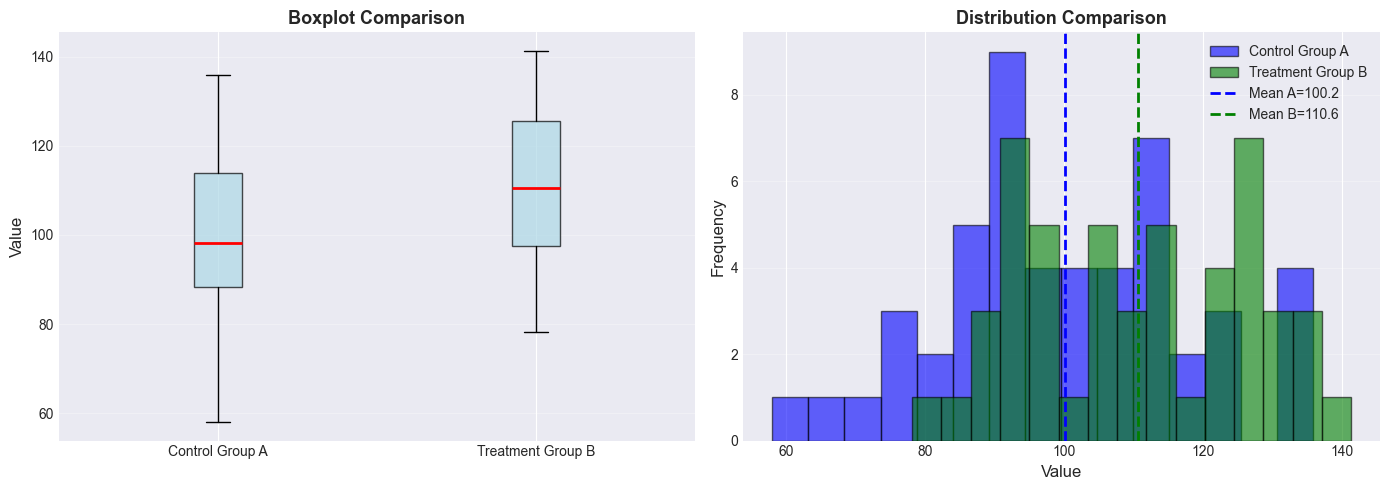


💡 统计显著性解释：
- p < 0.05: 有统计学意义的差异（5% 显著性水平）
- p < 0.01: 高度显著
- p < 0.001: 极其显著
- 在实际应用中，还需考虑效应量（effect size）而非仅看 p 值


In [ ]:
from scipy import stats

# 生成两组模拟数据
np.random.seed(123)
group_A = np.random.normal(loc=100, scale=15, size=50)  # 对照组: 均值=100, 标准差=15
group_B = np.random.normal(loc=110, scale=15, size=50)  # 实验组: 均值=110, 标准差=15

print("="*60)
print("📊 两组数据描述性统计")
print("="*60)
print(f"对照组 A: 均值={group_A.mean():.2f}, 标准差={group_A.std():.2f}, 样本量={len(group_A)}")
print(f"实验组 B: 均值={group_B.mean():.2f}, 标准差={group_B.std():.2f}, 样本量={len(group_B)}")
print("="*60)

# 进行独立样本 t 检验
t_statistic, p_value = stats.ttest_ind(group_A, group_B)

print("\n📈 独立样本 t 检验结果")
print("="*60)
print(f"t 统计量: {t_statistic:.4f}")
print(f"p 值: {p_value:.4f}")
print("="*60)

if p_value < 0.05:
    print("✅ 结论: p < 0.05，拒绝原假设，两组均值存在显著差异")
else:
    print("❌ 结论: p ≥ 0.05，不能拒绝原假设，两组均值无显著差异")

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左图：箱线图
axes[0].boxplot([group_A, group_B], labels=['Control Group A', 'Treatment Group B'],
                 patch_artist=True,
                 boxprops=dict(facecolor='lightblue', alpha=0.7),
                 medianprops=dict(color='red', linewidth=2))
axes[0].set_ylabel('Value', fontsize=12)
axes[0].set_title('Boxplot Comparison', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# 右图：直方图
axes[1].hist(group_A, bins=15, alpha=0.6, color='blue', label='Control Group A', edgecolor='black')
axes[1].hist(group_B, bins=15, alpha=0.6, color='green', label='Treatment Group B', edgecolor='black')
axes[1].axvline(group_A.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean A={group_A.mean():.1f}')
axes[1].axvline(group_B.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean B={group_B.mean():.1f}')
axes[1].set_xlabel('Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution Comparison', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n💡 统计显著性解释：")
print("- p < 0.05: 有统计学意义的差异（5% 显著性水平）")
print("- p < 0.01: 高度显著")
print("- p < 0.001: 极其显著")
print("- 在实际应用中，还需考虑效应量（effect size）而非仅看 p 值")

### 🔍 扩展：Shapiro-Wilk 正态性检验

t 检验假设数据服从正态分布。我们可以用 **Shapiro-Wilk 检验**验证这一假设。

In [ ]:
# 正态性检验
shapiro_A = stats.shapiro(group_A)
shapiro_B = stats.shapiro(group_B)

print("\n🔬 Shapiro-Wilk 正态性检验")
print("="*60)
print(f"对照组 A: 统计量={shapiro_A.statistic:.4f}, p值={shapiro_A.pvalue:.4f}")
print(f"实验组 B: 统计量={shapiro_B.statistic:.4f}, p值={shapiro_B.pvalue:.4f}")
print("="*60)
print("解释: 如果 p > 0.05，则数据符合正态分布假设")

if shapiro_A.pvalue > 0.05 and shapiro_B.pvalue > 0.05:
    print("✅ 两组数据均符合正态分布，适用 t 检验")
else:
    print("⚠️  数据可能不符合正态分布，考虑使用非参数检验（如 Mann-Whitney U 检验)")


🔬 Shapiro-Wilk 正态性检验
对照组 A: 统计量=0.9851, p值=0.7741
实验组 B: 统计量=0.9586, p值=0.0773
解释: 如果 p > 0.05，则数据符合正态分布假设
✅ 两组数据均符合正态分布，适用 t 检验


---

## 2.3 使用 SciPy 拟合概率分布

### 📖 知识点

**分布拟合**用于估计数据的概率分布参数。常见应用：
- 风险评估（保险、金融）
- 质量控制（产品合格率）
- 自然现象建模（降雨量、身高分布）

### 实战：正态分布参数估计

📊 正态分布拟合结果
真实参数: μ=170, σ=10
拟合参数: μ=170.10, σ=9.82


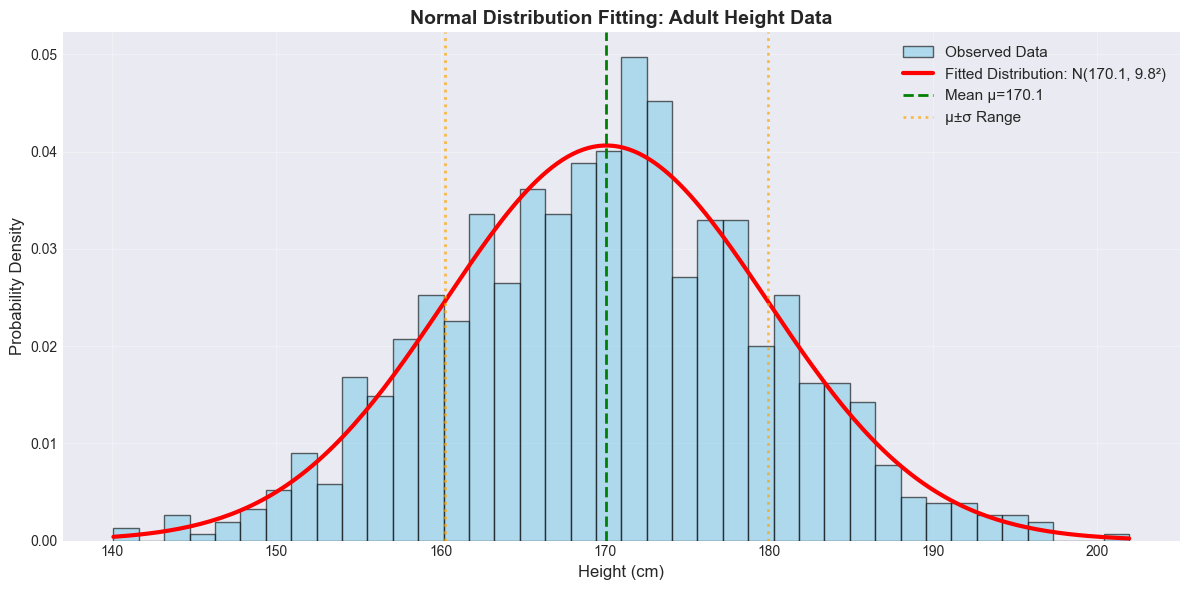


📏 95% 置信区间: [150.85, 189.35] cm
💡 解释: 95% 的人身高在此区间内

🎯 应用: 身高超过 180 cm 的概率为 15.68%


In [ ]:
from scipy.stats import norm

# 生成模拟数据（正态分布）
np.random.seed(888)
true_mean, true_std = 170, 10  # 真实参数：身高数据（cm）
data = np.random.normal(true_mean, true_std, size=1000)

# 使用 MLE（最大似然估计）拟合正态分布
mu_fit, sigma_fit = norm.fit(data)

print("="*60)
print("📊 正态分布拟合结果")
print("="*60)
print(f"真实参数: μ={true_mean}, σ={true_std}")
print(f"拟合参数: μ={mu_fit:.2f}, σ={sigma_fit:.2f}")
print("="*60)

# 可视化
plt.figure(figsize=(12, 6))

# 绘制直方图
counts, bins, patches = plt.hist(data, bins=40, density=True, alpha=0.6,
                                  color='skyblue', edgecolor='black', label='Observed Data')

# 绘制拟合的概率密度函数
x_range = np.linspace(data.min(), data.max(), 200)
pdf_fitted = norm.pdf(x_range, mu_fit, sigma_fit)
plt.plot(x_range, pdf_fitted, 'r-', linewidth=3,
         label=f'Fitted Distribution: N({mu_fit:.1f}, {sigma_fit:.1f}²)')

# 标注均值和标准差
plt.axvline(mu_fit, color='green', linestyle='--', linewidth=2, label=f'Mean μ={mu_fit:.1f}')
plt.axvline(mu_fit - sigma_fit, color='orange', linestyle=':', linewidth=2, alpha=0.7)
plt.axvline(mu_fit + sigma_fit, color='orange', linestyle=':', linewidth=2, alpha=0.7,
            label=f'μ±σ Range')

plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Normal Distribution Fitting: Adult Height Data', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 计算置信区间
ci_95 = norm.interval(0.95, loc=mu_fit, scale=sigma_fit)
print(f"\n📏 95% 置信区间: [{ci_95[0]:.2f}, {ci_95[1]:.2f}] cm")
print(f"💡 解释: 95% 的人身高在此区间内")

# 应用示例：计算概率
prob_above_180 = 1 - norm.cdf(180, mu_fit, sigma_fit)
print(f"\n🎯 应用: 身高超过 180 cm 的概率为 {prob_above_180*100:.2f}%")

---

## 2.4 使用 scipy.signal 进行信号处理

### 📖 知识点

**信号处理**在工程、金融、生物医学等领域广泛应用。**低通滤波器**可以去除高频噪声，保留低频信号。

### 应用场景
- 心电图（ECG）去噪
- 音频降噪
- 股票价格平滑
- 传感器数据清洗

### 实战：Butterworth 低通滤波

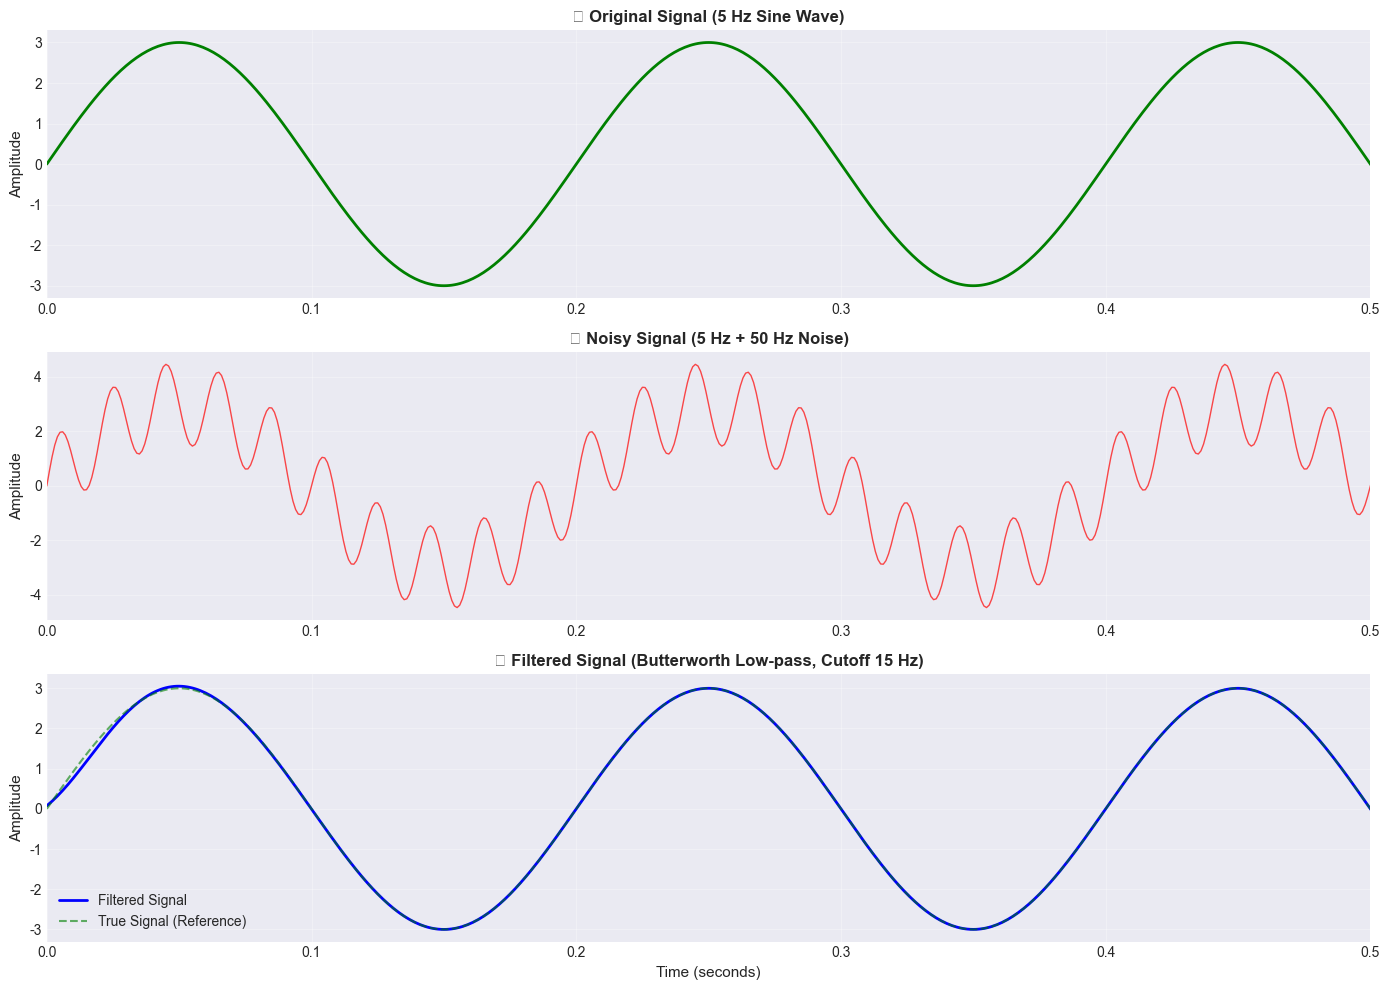

📡 信号处理结果
采样频率: 1000 Hz
截止频率: 15 Hz
滤波器阶数: 4

💡 低通滤波原理：
- 保留低于截止频率的信号（5 Hz）
- 衰减高于截止频率的噪声（50 Hz）
- Butterworth 滤波器特点：通带内平坦响应
- filtfilt 函数：前向-后向滤波，无相位失真


In [ ]:
from scipy.signal import butter, filtfilt

# 生成带噪声的正弦信号
fs = 1000  # 采样频率 (Hz)
t = np.linspace(0, 2, 2*fs, endpoint=False)  # 时间轴: 0-2秒

# 信号 = 低频正弦波 + 高频噪声
signal_clean = 3 * np.sin(2 * np.pi * 5 * t)  # 5 Hz 正弦波
noise = 1.5 * np.sin(2 * np.pi * 50 * t)      # 50 Hz 噪声
signal_noisy = signal_clean + noise

# 设计 Butterworth 低通滤波器
# 截止频率: 15 Hz（保留 5 Hz 信号，滤除 50 Hz 噪声）
cutoff_freq = 15  # 截止频率
nyquist_freq = fs / 2  # 奈奎斯特频率
normalized_cutoff = cutoff_freq / nyquist_freq

# butter(N, Wn): N 为滤波器阶数，Wn 为归一化截止频率
b, a = butter(N=4, Wn=normalized_cutoff, btype='low')

# 应用滤波器（filtfilt 实现零相位失真）
signal_filtered = filtfilt(b, a, signal_noisy)

# 可视化
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# 子图1: 原始干净信号
axes[0].plot(t, signal_clean, 'g-', linewidth=2)
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].set_title('① Original Signal (5 Hz Sine Wave)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 0.5])  # 只显示前 0.5 秒

# 子图2: 带噪声信号
axes[1].plot(t, signal_noisy, 'r-', linewidth=1, alpha=0.7)
axes[1].set_ylabel('Amplitude', fontsize=11)
axes[1].set_title('② Noisy Signal (5 Hz + 50 Hz Noise)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, 0.5])

# 子图3: 滤波后信号
axes[2].plot(t, signal_filtered, 'b-', linewidth=2, label='Filtered Signal')
axes[2].plot(t, signal_clean, 'g--', linewidth=1.5, alpha=0.6, label='True Signal (Reference)')
axes[2].set_xlabel('Time (seconds)', fontsize=11)
axes[2].set_ylabel('Amplitude', fontsize=11)
axes[2].set_title('③ Filtered Signal (Butterworth Low-pass, Cutoff 15 Hz)',
                   fontsize=12, fontweight='bold')
axes[2].legend(fontsize=10)
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim([0, 0.5])

plt.tight_layout()
plt.show()

print("="*60)
print("📡 信号处理结果")
print("="*60)
print(f"采样频率: {fs} Hz")
print(f"截止频率: {cutoff_freq} Hz")
print(f"滤波器阶数: 4")
print("="*60)
print("\n💡 低通滤波原理：")
print("- 保留低于截止频率的信号（5 Hz）")
print("- 衰减高于截止频率的噪声（50 Hz）")
print("- Butterworth 滤波器特点：通带内平坦响应")
print("- filtfilt 函数：前向-后向滤波，无相位失真")

---

## 2.5 使用 scipy.integrate.solve_ivp 解常微分方程 ODE

### 📖 知识点

**常微分方程（ODE）**描述变量随时间的变化规律。许多自然现象可以用 ODE 建模：
- 人口增长模型
- 放射性衰变
- 化学反应动力学
- 金融领域的 Black-Scholes 方程

`scipy.integrate.solve_ivp` 可以数值求解初值问题（IVP）。

### 实战：一阶线性 ODE 求解

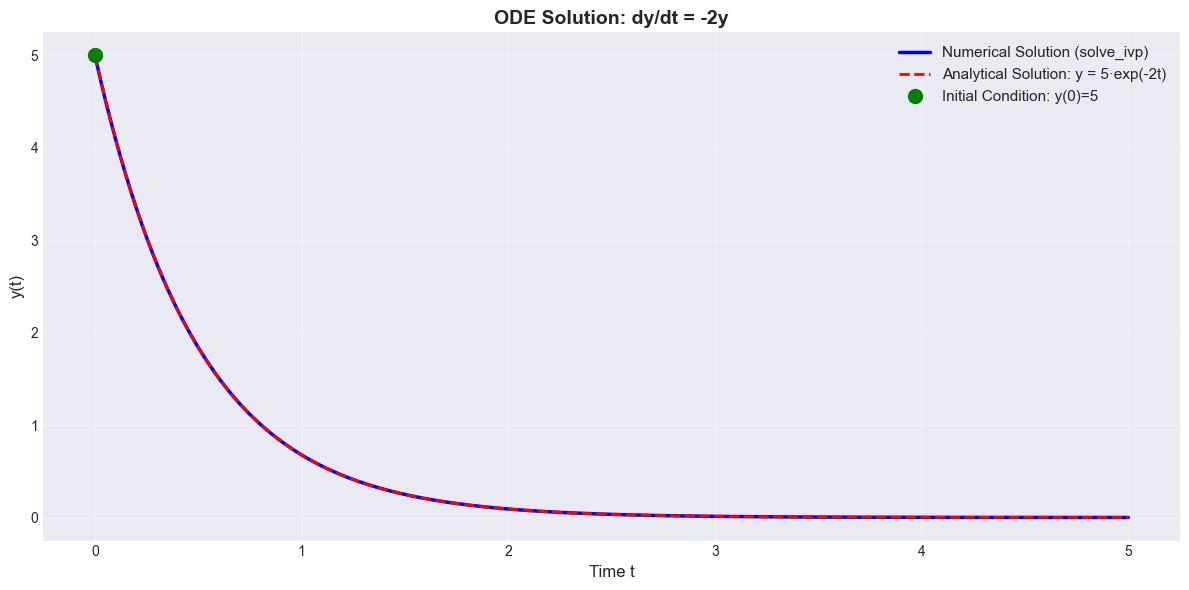

🧮 ODE 求解结果
方程: dy/dt = -2y
Initial Condition: y(0) = 5
求解方法: RK45 (Runge-Kutta 4/5阶)
最大数值误差: 2.13e-03

💡 应用场景：
- 放射性物质衰变: dN/dt = -λN
- 药物代谢: dC/dt = -kC (C为药物浓度)
- 牛顿冷却定律: dT/dt = -k(T - T_env)
- 金融模型: 连续复利计算


In [ ]:
from scipy.integrate import solve_ivp

# 定义 ODE: dy/dt = -2y
# 这是一个指数衰减方程
def ode_func(t, y):
    return -2 * y

# Initial Condition: t=0 时, y=5
y0 = [5]
t_span = (0, 5)  # 求解区间: [0, 5]
t_eval = np.linspace(0, 5, 200)  # 评估点

# 数值求解
solution = solve_ivp(ode_func, t_span, y0, t_eval=t_eval, method='RK45')

# 解析解（用于对比）
# dy/dt = -2y 的解析解为: y(t) = y0 * exp(-2t)
y_analytical = y0[0] * np.exp(-2 * t_eval)

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(solution.t, solution.y[0], 'b-', linewidth=2.5, label='Numerical Solution (solve_ivp)')
plt.plot(t_eval, y_analytical, 'r--', linewidth=2, label='Analytical Solution: y = 5·exp(-2t)')
plt.scatter([0], [y0[0]], color='green', s=100, zorder=5, label=f'Initial Condition: y(0)={y0[0]}')
plt.xlabel('Time t', fontsize=12)
plt.ylabel('y(t)', fontsize=12)
plt.title('ODE Solution: dy/dt = -2y', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 计算误差
error = np.abs(solution.y[0] - y_analytical).max()

print("="*60)
print("🧮 ODE 求解结果")
print("="*60)
print(f"方程: dy/dt = -2y")
print(f"Initial Condition: y(0) = {y0[0]}")
print(f"求解方法: RK45 (Runge-Kutta 4/5阶)")
print(f"最大数值误差: {error:.2e}")
print("="*60)
print("\n💡 应用场景：")
print("- 放射性物质衰变: dN/dt = -λN")
print("- 药物代谢: dC/dt = -kC (C为药物浓度)")
print("- 牛顿冷却定律: dT/dt = -k(T - T_env)")
print("- 金融模型: 连续复利计算")

### 🔍 扩展：SIR 传染病模型（耦合 ODE 系统）

SIR 模型是流行病学中的经典模型，由三个耦合的微分方程组成。

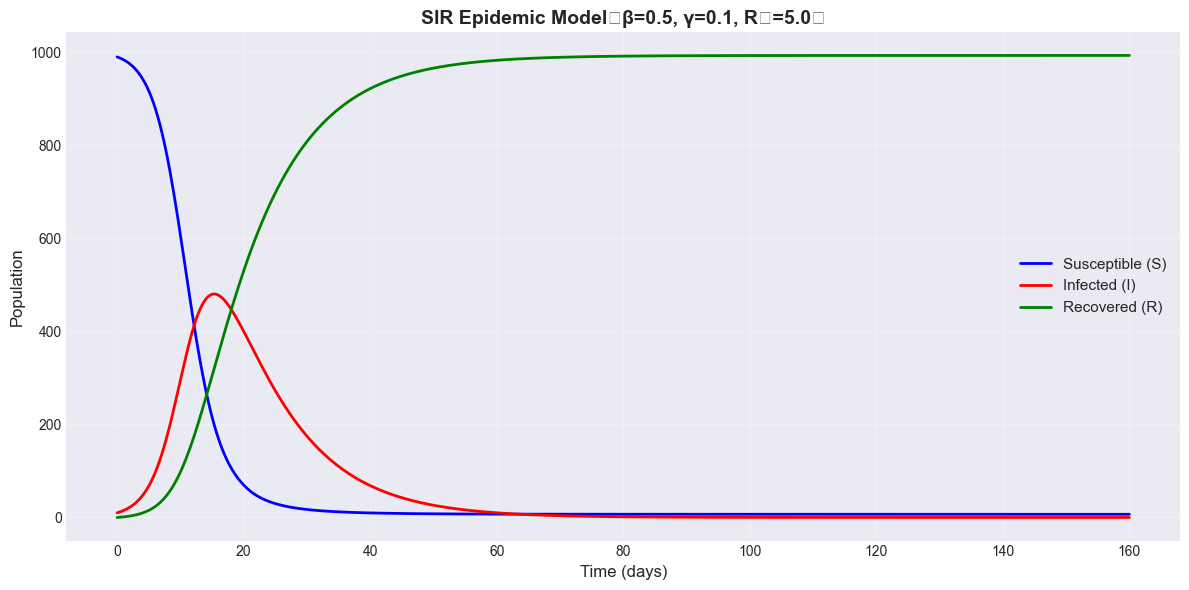


📊 基本再生数 R₀ = β/γ = 5.00
💡 R₀ > 1: 疫情爆发; R₀ < 1: 疫情消退


In [ ]:
# SIR 模型: S(易感者), I(感染者), R(康复者)
def sir_model(t, y, beta, gamma):
    S, I, R = y
    N = S + I + R
    dS_dt = -beta * S * I / N
    dI_dt = beta * S * I / N - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

# 参数设置
beta = 0.5   # 传播率
gamma = 0.1  # 康复率
y0_sir = [990, 10, 0]  # 初始: 990易感, 10感染, 0康复
t_span_sir = (0, 160)
t_eval_sir = np.linspace(0, 160, 500)

# 求解
sol_sir = solve_ivp(sir_model, t_span_sir, y0_sir, t_eval=t_eval_sir,
                     args=(beta, gamma), method='RK45')

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(sol_sir.t, sol_sir.y[0], 'b-', linewidth=2, label='Susceptible (S)')
plt.plot(sol_sir.t, sol_sir.y[1], 'r-', linewidth=2, label='Infected (I)')
plt.plot(sol_sir.t, sol_sir.y[2], 'g-', linewidth=2, label='Recovered (R)')
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.title(f'SIR Epidemic Model（β={beta}, γ={gamma}, R₀={beta/gamma:.1f}）',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 基本再生数 R₀ = β/γ = {beta/gamma:.2f}")
print("💡 R₀ > 1: 疫情爆发; R₀ < 1: 疫情消退")

---

# 3. 小型综合项目：噪声信号分析流程

## 🎯 项目目标

模拟一个完整的数据分析流程，整合多个 SciPy 子模块：

1. **信号采集**：生成带噪声的传感器数据
2. **信号处理**：使用低通滤波去噪
3. **峰值检测**：找到信号中的关键特征点
4. **曲线拟合**：用数学模型拟合信号趋势
5. **统计分析**：对噪声进行统计检验

## 应用场景
- 生物医学信号分析（心电图、脑电图）
- 环境监测（温度、湿度传感器）
- 工业质量控制

---

## 步骤 1: 生成模拟传感器数据

In [ ]:
from scipy.signal import find_peaks

# 生成模拟数据：周期性信号 + 趋势 + 噪声
np.random.seed(42)
t_sensor = np.linspace(0, 10, 500)

# 信号成分:
# 1. 周期性震荡（传感器读数的周期性变化）
periodic = 2 * np.sin(2 * np.pi * 1.5 * t_sensor) + 0.5 * np.sin(2 * np.pi * 3 * t_sensor)

# 2. 指数衰减趋势（系统响应）
trend = 3 * np.exp(-0.3 * t_sensor)

# 3. 高频噪声
noise_high_freq = 0.5 * np.random.randn(len(t_sensor))

# 原始信号
signal_raw = periodic + trend + noise_high_freq

print("✅ 步骤1完成: 生成模拟传感器数据")
print(f"   数据点数: {len(signal_raw)}")
print(f"   时间范围: {t_sensor[0]:.1f} - {t_sensor[-1]:.1f} 秒")

✅ 步骤1完成: 生成模拟传感器数据
   数据点数: 500
   时间范围: 0.0 - 10.0 秒


## 步骤 2: 低通滤波去噪

In [ ]:
# 设计低通滤波器
from scipy.signal import butter, filtfilt

fs_sensor = 50  # 采样频率
cutoff = 5      # 截止频率
nyq = fs_sensor / 2
normal_cutoff = cutoff / nyq

b_filt, a_filt = butter(4, normal_cutoff, btype='low')
signal_filtered = filtfilt(b_filt, a_filt, signal_raw)

print("✅ 步骤2完成: 低通滤波去噪")
print(f"   滤波器类型: Butterworth 4阶")
print(f"   截止频率: {cutoff} Hz")

✅ 步骤2完成: 低通滤波去噪
   滤波器类型: Butterworth 4阶
   截止频率: 5 Hz


## 步骤 3: 峰值检测

In [ ]:
# 在滤波后的信号中查找峰值
peaks, properties = find_peaks(signal_filtered, prominence=0.5, distance=30)

print(f"✅ 步骤3完成: 峰值检测")
print(f"   检测到 {len(peaks)} 个峰值")
print(f"   峰值位置（索引）: {peaks[:5]}...")

✅ 步骤3完成: 峰值检测
   检测到 15 个峰值
   峰值位置（索引）: [  6  40  72 106 139]...


## 步骤 4: 趋势曲线拟合

In [ ]:
# 拟合指数衰减趋势
from scipy.optimize import curve_fit

def exp_decay_trend(x, a, b, c):
    return a * np.exp(-b * x) + c

popt_trend, _ = curve_fit(exp_decay_trend, t_sensor, signal_filtered,
                           p0=[3, 0.3, 0])
trend_fitted = exp_decay_trend(t_sensor, *popt_trend)

print(f"✅ 步骤4完成: 趋势拟合")
print(f"   拟合参数: a={popt_trend[0]:.3f}, b={popt_trend[1]:.3f}, c={popt_trend[2]:.3f}")

✅ 步骤4完成: 趋势拟合
   拟合参数: a=3.255, b=0.311, c=-0.047


## 步骤 5: 噪声统计分析

In [ ]:
# 提取噪声成分
noise_residual = signal_raw - signal_filtered

# 统计检验：噪声是否符合正态分布
from scipy import stats
shapiro_noise = stats.shapiro(noise_residual)
noise_mean = noise_residual.mean()
noise_std = noise_residual.std()

print(f"✅ 步骤5完成: 噪声统计分析")
print(f"   噪声均值: {noise_mean:.4f}")
print(f"   噪声标准差: {noise_std:.4f}")
print(f"   Shapiro检验 p值: {shapiro_noise.pvalue:.4f}")
if shapiro_noise.pvalue > 0.05:
    print("   ✅ 噪声符合正态分布假设")
else:
    print("   ⚠️  噪声可能不符合正态分布")

✅ 步骤5完成: 噪声统计分析
   噪声均值: -0.0002
   噪声标准差: 0.4314
   Shapiro检验 p值: 0.6724
   ✅ 噪声符合正态分布假设


## 综合可视化

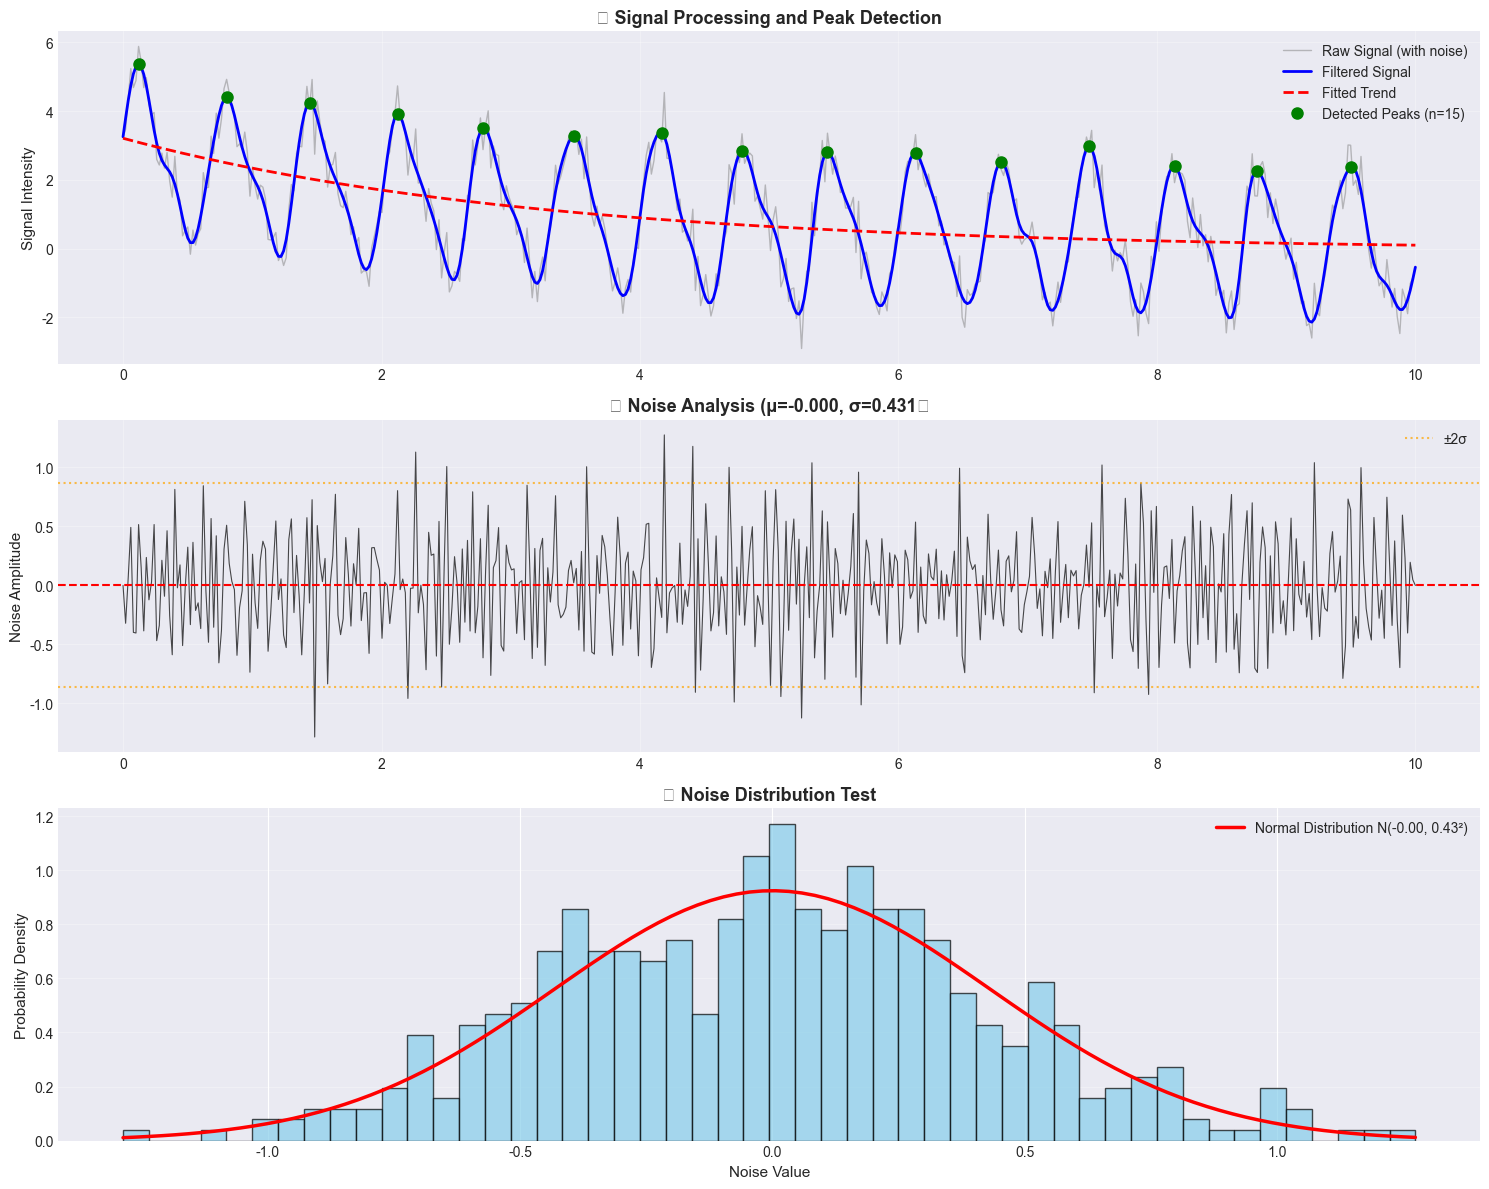

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# 子图1: 原始信号 vs 滤波信号 vs 趋势
axes[0].plot(t_sensor, signal_raw, 'gray', alpha=0.5, linewidth=1, label='Raw Signal (with noise)')
axes[0].plot(t_sensor, signal_filtered, 'b-', linewidth=2, label='Filtered Signal')
axes[0].plot(t_sensor, trend_fitted, 'r--', linewidth=2, label='Fitted Trend')
axes[0].plot(t_sensor[peaks], signal_filtered[peaks], 'go', markersize=8, label=f'Detected Peaks (n={len(peaks)})')
axes[0].set_ylabel('Signal Intensity', fontsize=11)
axes[0].set_title('① Signal Processing and Peak Detection', fontsize=13, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=10)
axes[0].grid(True, alpha=0.3)

# 子图2: 噪声成分
axes[1].plot(t_sensor, noise_residual, 'k-', linewidth=0.8, alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[1].axhline(noise_mean + 2*noise_std, color='orange', linestyle=':', alpha=0.7, label='±2σ')
axes[1].axhline(noise_mean - 2*noise_std, color='orange', linestyle=':', alpha=0.7)
axes[1].set_ylabel('Noise Amplitude', fontsize=11)
axes[1].set_title(f'② Noise Analysis (μ={noise_mean:.3f}, σ={noise_std:.3f}）', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

# 子图3: 噪声直方图 + 正态拟合
axes[2].hist(noise_residual, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x_noise = np.linspace(noise_residual.min(), noise_residual.max(), 100)
axes[2].plot(x_noise, stats.norm.pdf(x_noise, noise_mean, noise_std),
             'r-', linewidth=2.5, label=f'Normal Distribution N({noise_mean:.2f}, {noise_std:.2f}²)')
axes[2].set_xlabel('Noise Value', fontsize=11)
axes[2].set_ylabel('Probability Density', fontsize=11)
axes[2].set_title('③ Noise Distribution Test', fontsize=13, fontweight='bold')
axes[2].legend(fontsize=10)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 📊 项目小结

### 使用的 SciPy 模块
1. **`scipy.signal`**: 低通滤波（`butter`, `filtfilt`）、峰值检测（`find_peaks`）
2. **`scipy.optimize`**: 曲线拟合（`curve_fit`）
3. **`scipy.stats`**: 正态性检验（`shapiro`）、概率分布（`norm`）

### 关键发现
- 低通滤波成功去除高频噪声
- 检测到信号中的周期性峰值
- 拟合出信号的衰减趋势
- 验证噪声符合正态分布

### 实际应用价值
此流程可直接应用于：
- 心电图（ECG）分析
- 环境传感器数据质控
- 工业设备振动监测
- 金融时间序列去噪

---

# 4. 练习题

通过以下练习巩固所学知识。请在代码单元格中完成练习。

---

## 练习 1: 多项式曲线拟合 ⭐

**任务**：
1. 生成一组数据点，服从二次函数 `y = 2x² - 3x + 5 + 噪声`
2. 使用 `numpy.polyfit` 或 `scipy.optimize.curve_fit` 拟合二次多项式
3. 绘制原始数据、真实曲线和拟合曲线
4. 计算拟合的 R² 分数

**提示**：
- x 范围可设为 `[-5, 5]`，生成 50 个数据点
- 噪声可使用 `np.random.normal(0, 2, size=...)`
- R² 分数公式：`1 - SS_res / SS_tot`

In [ ]:
# 在此处完成练习 1


---

## 练习 2: 配对样本 t 检验 ⭐⭐

**场景**：某减肥药临床试验，记录了 20 名受试者服药前后的体重。

**任务**：
1. 生成模拟数据：
   - 服药前体重：`np.random.normal(80, 10, 20)`
   - 服药后体重：服药前 - `np.random.uniform(2, 8, 20)`（模拟减重）
2. 使用 `scipy.stats.ttest_rel` 进行配对 t 检验
3. 绘制前后对比图（散点图或箱线图）
4. 解释 p 值的含义

**提示**：
- `ttest_rel` 用于配对样本
- 配对 t 检验假设：差值服从正态分布

In [ ]:
# 在此处完成练习 2


---

## 练习 3: 拟合指数分布 ⭐⭐

**场景**：某呼叫中心记录了客户等待时间，已知等待时间通常服从指数分布。

**任务**：
1. 生成 500 个服从指数分布的数据点（λ=0.5）
   - 使用 `np.random.exponential(scale=2.0, size=500)`
2. 用 `scipy.stats.expon.fit` 估计参数
3. 绘制直方图 + 拟合的概率密度函数
4. 计算'等待时间超过 5 分钟'的概率

**提示**：
- 指数分布参数：`scale = 1/λ`
- 使用 `expon.sf(x, loc, scale)` 计算生存函数（P(X > x)）

In [ ]:
# 在此处完成练习 3


---

## 练习 4: 带通滤波器设计 ⭐⭐⭐

**任务**：
1. 生成一个混合信号：
   - 10 Hz 正弦波（目标信号）
   - 2 Hz 低频漂移
   - 50 Hz 高频噪声
2. 设计一个带通滤波器，保留 8-12 Hz 的频率成分
3. 对比滤波前后的频谱图（使用 `np.fft.fft`）
4. 绘制时域和频域对比图

**提示**：
- 带通滤波器：`butter(N, [low, high], btype='band')`
- 频谱计算：`np.abs(np.fft.rfft(signal))`

In [ ]:
# 在此处完成练习 4


---

## 练习 5: Lotka-Volterra 捕食者-猎物模型 ⭐⭐⭐⭐

**背景**：Lotka-Volterra 方程描述捕食者与猎物的种群动态：

$$
\begin{cases}
\frac{dx}{dt} = \alpha x - \beta xy \\
\frac{dy}{dt} = \delta xy - \gamma y
\end{cases}
$$

- x: 猎物数量
- y: 捕食者数量
- α, β, δ, γ: 系统参数

**任务**：
1. 使用 `scipy.integrate.solve_ivp` 求解方程组
2. 参数设置：α=1.0, β=0.1, δ=0.075, γ=1.5
3. 初始条件：x(0)=10, y(0)=5
4. 绘制：
   - 时间序列图（x 和 y 随时间变化）
   - 相图（x-y 平面上的轨迹）

**提示**：
- 定义函数 `lotka_volterra(t, z, alpha, beta, delta, gamma)`
- `z = [x, y]`
- 求解时间区间：[0, 50]

In [ ]:
# 在此处完成练习 5
